## Introduction to image classification

This tutorial is an introduction of machine learning with scikit learn in which we will build image recognition classifier to determines the house number displayed in images from Google Street View.

## Feature processing
First thing is to understand and become one with the data, and for this purpose we can start by loading and viewing the image files. We begin with importing required libraries.

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, loading the training dataset.

**The dataset can be downloaded from [here](https://www.kaggle.com/khanhvudo72/svhncropped)

In [2]:
# load dataset
train_data = scipy.io.loadmat('../input/svhncropped/extra_32x32.mat')

In [3]:
# extract the images and labels from the dictionary object
X = train_data['X']
y = train_data['y']

In [4]:
# View X (first image)
X.shape, X.ndim, X[0]

((32, 32, 3, 531131),
 4,
 array([[[ 80,  76,  75, ..., 191, 188, 189],
         [ 32,  33,  32, ..., 192, 192, 191],
         [ 26,  25,  22, ..., 194, 195, 196]],
 
        [[ 80,  78,  75, ..., 191, 188, 189],
         [ 33,  35,  33, ..., 192, 192, 192],
         [ 26,  26,  22, ..., 194, 195, 197]],
 
        [[ 79,  79,  77, ..., 191, 188, 188],
         [ 33,  36,  34, ..., 192, 192, 191],
         [ 26,  27,  25, ..., 194, 195, 196]],
 
        ...,
 
        [[ 98,  66,  72, ..., 196, 199, 190],
         [ 67,  30,  33, ..., 198, 203, 195],
         [ 59,  30,  26, ..., 199, 204, 198]],
 
        [[ 67,  65,  72, ..., 195, 208, 191],
         [ 34,  30,  33, ..., 195, 210, 195],
         [ 26,  32,  28, ..., 193, 210, 198]],
 
        [[ 68,  64,  75, ..., 190, 216, 191],
         [ 28,  33,  34, ..., 191, 217, 195],
         [ 22,  32,  31, ..., 187, 216, 198]]], dtype=uint8))

In [5]:
# View y (first label)
y.shape, y.ndim, y[0]

((531131, 1), 2, array([4], dtype=uint8))

Images are 4D and their labels are 1D matrix respectively, so to access the i-th image in our dataset we would be looking for X[:,:,:,i], and its label would be y[i].

How about plotting an image at 25 index?

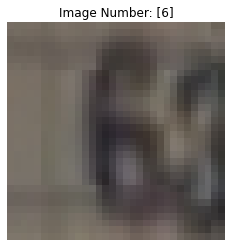

In [6]:
# view an image (e.g. 25) and print its corresponding label
img_index = 25
plt.imshow(X[:,:,:,img_index])
plt.title(f'Image Number: {y[img_index]}')
plt.axis(False)
plt.show()

As we can see, we load up an image showing house number 6 and the label also printed 6. We can change image simply by replacing index of the image (to any number between 0 and 531130).

However, to use these images with a machine learning algorithm, we first need to vectorise them and reshape each image into 3D (heigth x width x color channels).

In [7]:
# Reshape data and shuffle it
from sklearn.utils import shuffle

X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2], X.shape[3]).T
y = y.reshape(y.shape[0],)
X, y = shuffle(X, y, random_state=42)

We also shuffle the dataset just to be sure there no underlying distributions. For reproducibility, we set `random_state` as well.

## Training the model

Now that we have our images ready for training but we need to decide which machine learning algorithm to use. We don't explicitly program an algorithm ourselves -- thanks to the machine learning frameworks like Scikit-learn that does all the heavy lifting for us.

We will use Random Forest approach with default hyperparameter for our image classification purpose. Random Forest are a collection of multiple decision trees with an output that averages the results of individual trees to prevent overfitting, and this make Random Forest robust. Of course, there are pros and cons of every scikit-learn algorithms but we won't get into that detail.

We then split our data into 80% training and 20% test sets and train our classifier.

In [8]:
# Spilt the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [9]:
# Instantiate Random Forest Classifier and train it
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

## Test results

Lets make our model predictions and find out the performance on accuracy score.

In [10]:
# Check accuracy score
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test,preds)}')

Accuracy: 0.8605251019044122


So our model has learnt how to classify house numbers from Google Stree View with ~86% accuracy just after training on few hundred thousand examples. Still the classifier can be improved further, but it's a great result for using the algorithm with default hyperparameters!!